In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import pickle
from Doublet_Quantifier.curvefit import *
from Doublet_Quantifier.models import *

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
sys.path.append('/Users/allybaldelli/Desktop/AMNH-stuff/quantifying_clouds_ally/functions')
from data_tools import *
from plotting_tools import *


In [7]:
mypath = '/Users/allybaldelli/Desktop/AMNH-stuff/quantifying_clouds_ally/'
dfs = []
temps = [1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400]

for temp in temps:
    with open(mypath + "diamondback-data/pickle_files/parameters/t"+ str(temp) + "_parameter_df.pkl", "rb") as f:
        df = pickle.load(f)
        df["temp"] = temp * np.ones(len(df))
        dfs.append(df[df['clouds'] != 10].copy(deep=False).reset_index(drop=True))

master_df = pd.concat(dfs, ignore_index=True)
[T1300, T1400, T1500, T1600, T1700, T1800, T1900, T2000, T2100, T2200, T2300, T2400] = dfs

del df


In [4]:
T1500ish = master_df[(master_df['temp'] <= 1600) & (master_df['temp'] >= 1400)].reset_index(drop=True)
T1400ish = master_df[(master_df['temp'] <= 1500) & (master_df['temp'] >= 1300)].reset_index(drop=True)
L4_L8 = master_df[(master_df['temp'] <= 1600)].reset_index(drop=True) 

L4_L8_temps = [1300, 1400, 1500, 1600]

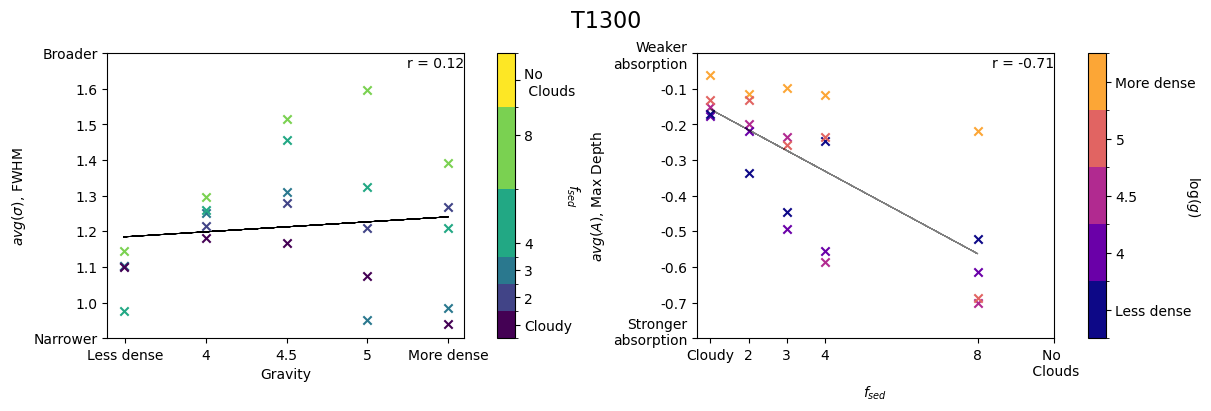

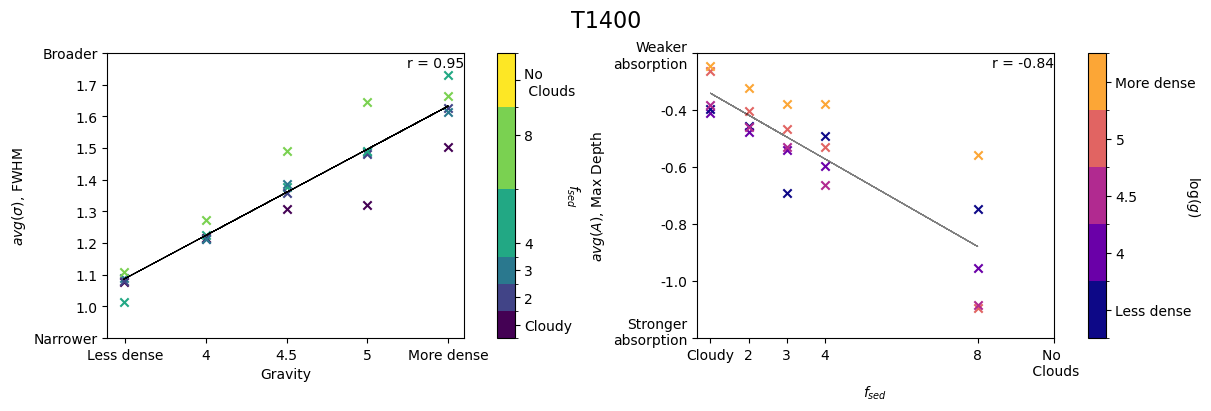

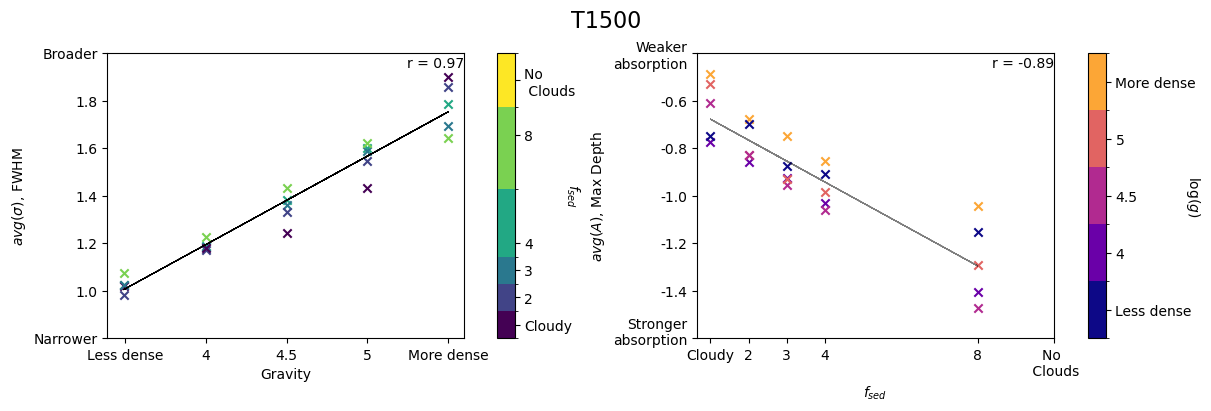

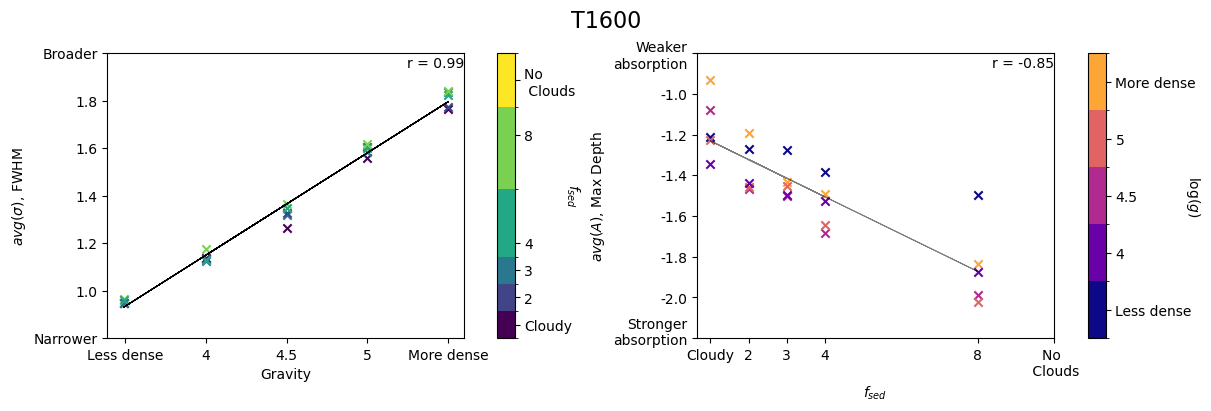

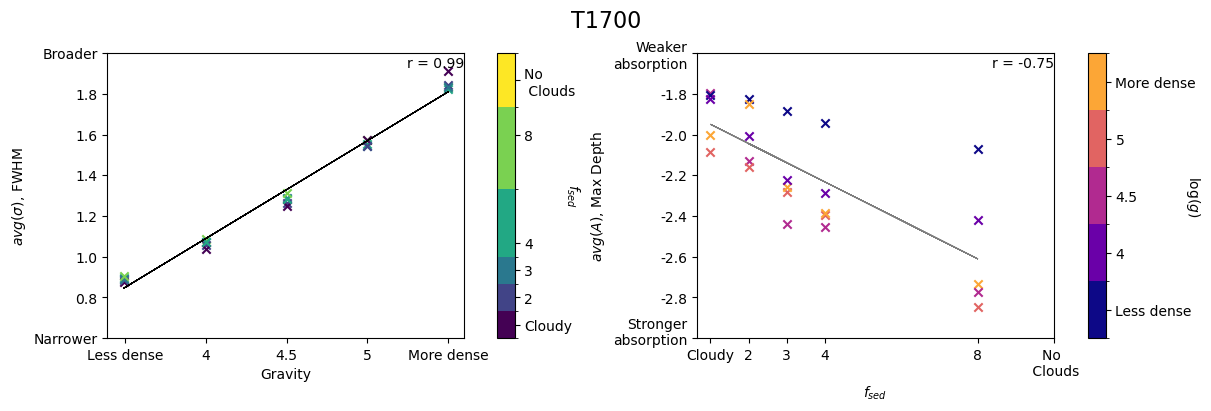

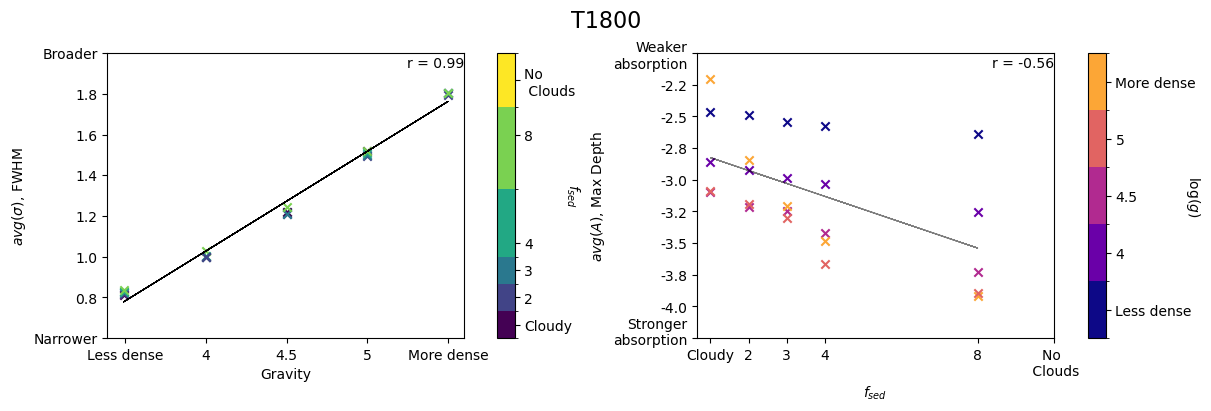

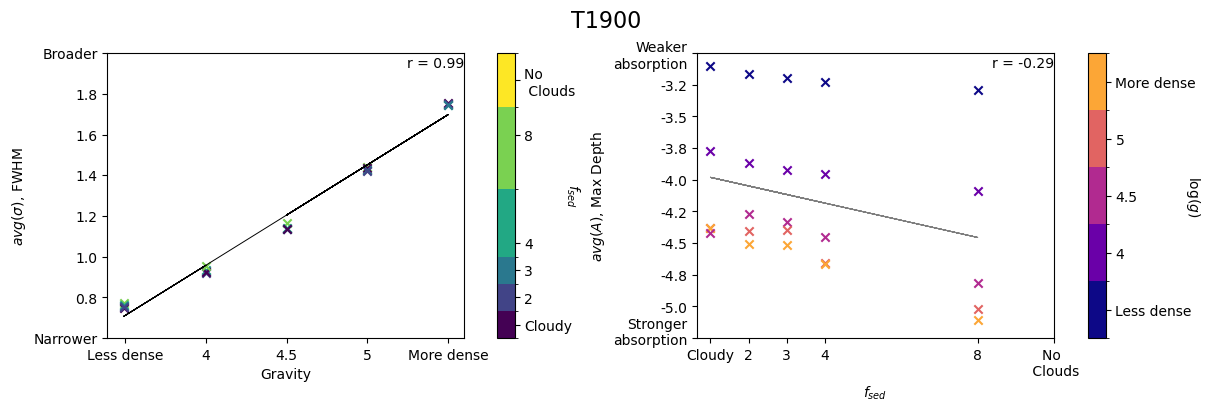

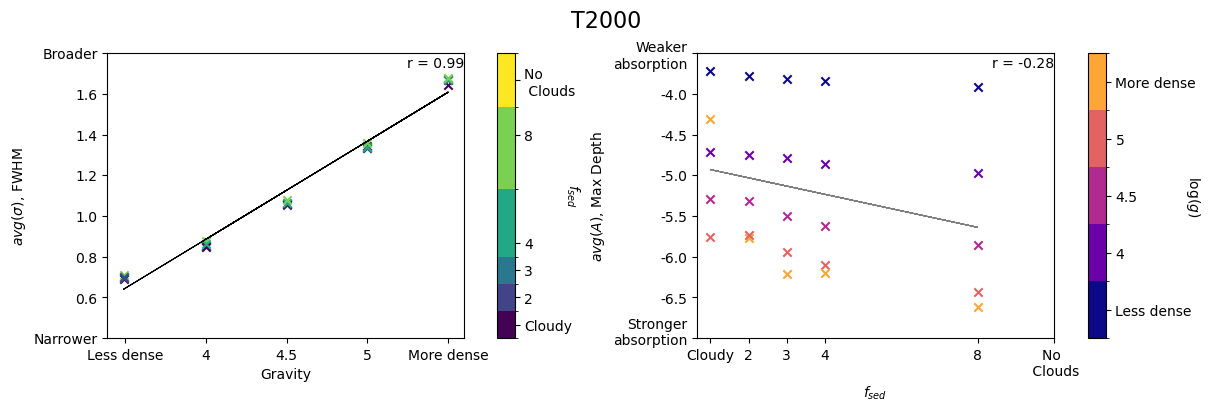

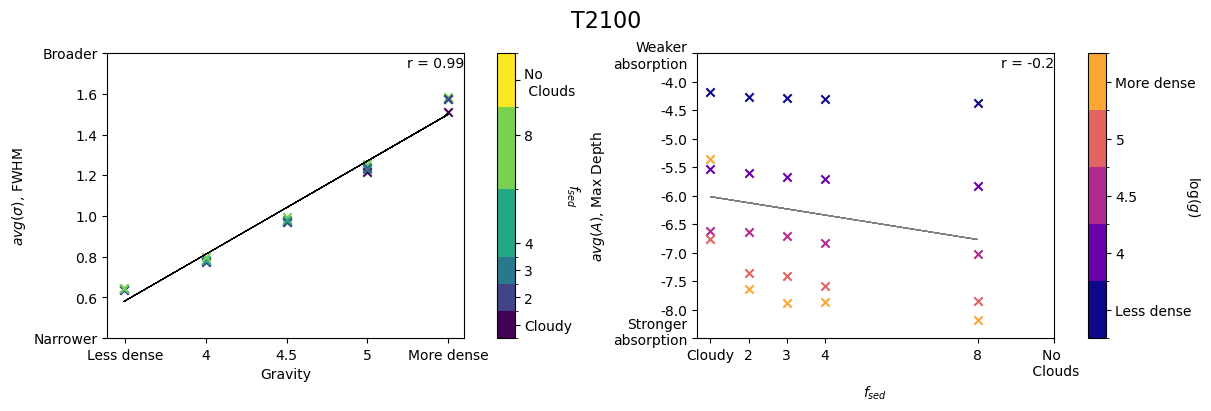

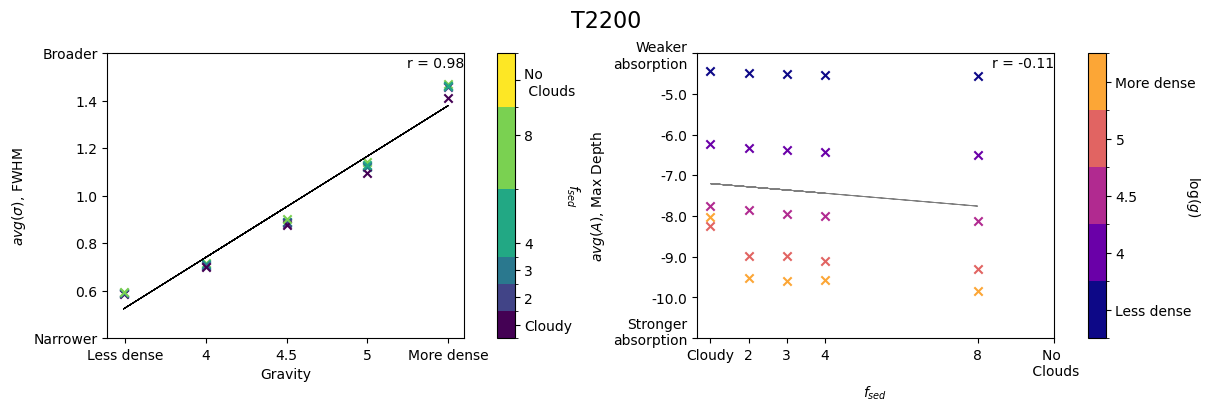

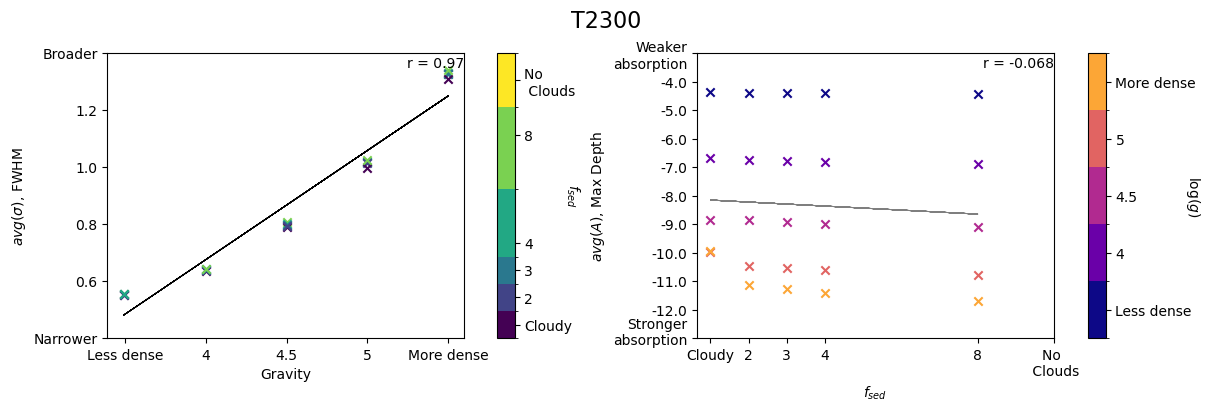

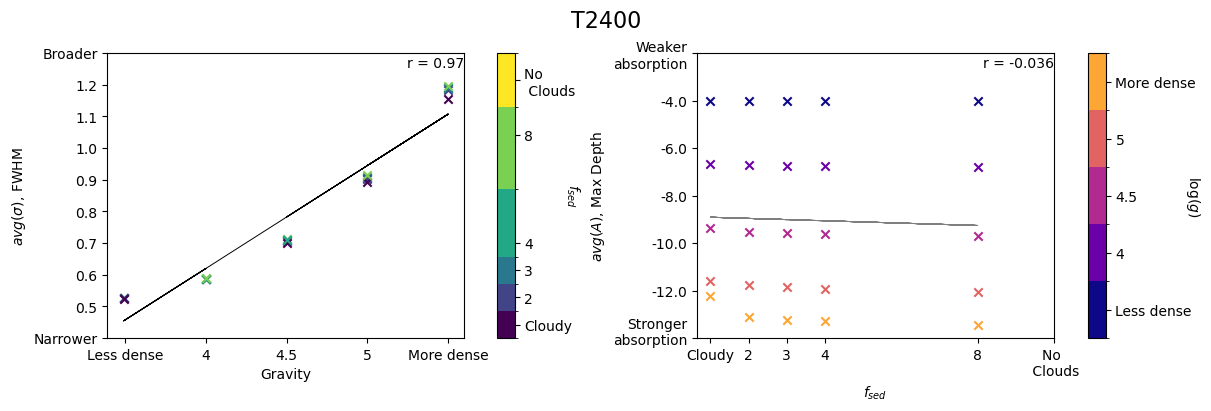

In [10]:
for index in range(len(temps)):
    temp = temps[index]
    focused_correlation_plot(dfs[index], title = 'T'+str(temp))
    plt.savefig('multi-T-plots/T'+str(temp)+'.pdf')


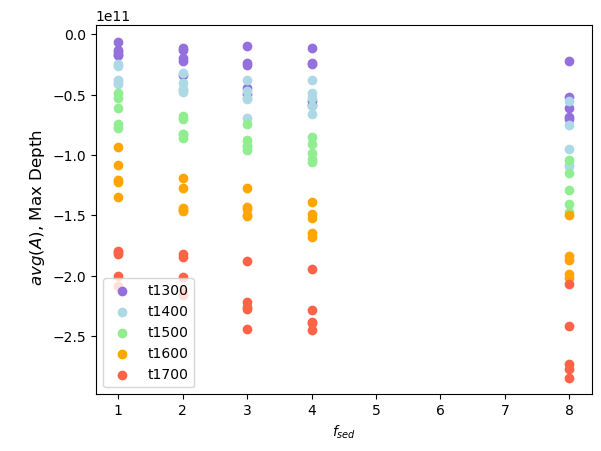

In [6]:
plt.scatter(T1300.clouds, (T1300.A1 + T1300.A2)/2, color = 'mediumpurple', label = "t1300")
plt.scatter(T1400.clouds, (T1400.A1 + T1400.A2)/2, color = 'lightblue', label = "t1400")
plt.scatter(T1500.clouds, (T1500.A1 + T1500.A2)/2, color = 'lightgreen', label = "t1500")
plt.scatter(T1600.clouds, (T1600.A1 + T1600.A2)/2, color = 'orange', label = "t1600")
plt.scatter(T1700.clouds, (T1700.A1 + T1700.A2)/2, color = 'tomato', label = "t1700")
plt.legend()
plt.ylabel("\n $avg(A)$, Max Depth", fontsize=12)
plt.xlabel(r"$f_{sed}$")
plt.show()